# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Data-Loading-/-Cleaning" data-toc-modified-id="Data-Loading-/-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Loading / Cleaning</a></div><div class="lev1 toc-item"><a href="#cost-center-clusters" data-toc-modified-id="cost-center-clusters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>cost center clusters</a></div><div class="lev1 toc-item"><a href="#Clusters-(just-diseases)" data-toc-modified-id="Clusters-(just-diseases)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clusters (just diseases)</a></div><div class="lev1 toc-item"><a href="#Clusters-(diseases-+-demographics)" data-toc-modified-id="Clusters-(diseases-+-demographics)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clusters (diseases + demographics)</a></div><div class="lev1 toc-item"><a href="#Clusters-(diseases-+-demographics-+-cost-centers)" data-toc-modified-id="Clusters-(diseases-+-demographics-+-cost-centers)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clusters (diseases + demographics + cost centers)</a></div><div class="lev1 toc-item"><a href="#Stuff-for-IHME" data-toc-modified-id="Stuff-for-IHME-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stuff for IHME</a></div>

# Imports


In [2]:
import pandas as pd
import ast
import itertools
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from helper_functions import *
#     functions contained:
#     prop_error(n, p, alpha = 0.05)
#     prop_error_pct(n, p, alpha = 0.05)
#     epi_rows(df, col, year = None)
#     age_bin(age, labels, bins)
#     comorbidity_indicator(data, cc)
#     prevalence(data, indicator)
#     age_adjusted_Frequency(data, indicator=None, comorbidities=None, weights = pd.Series([]), yr = None)

In [3]:
pd.set_option('display.max_colwidth', -1)

# Data Loading / Cleaning

In [5]:
df_merged = pd.read_csv('data/merged_cost_conditions.csv')
df_merged.classes = df_merged.classes.apply(lambda x: ast.literal_eval(x))
df_merged.agg_indices = df_merged.agg_indices.fillna('None').apply(lambda x: ast.literal_eval(x))

df_merged.sex.fillna('Not provided')

# IMPORT DESCRIPTION AND CONDITION INDICES
cond_dict = pd.read_excel('data/disease_dictionary.xls').short.to_dict()
desc_dict = pd.read_excel('data/disease_dictionary.xls').long.to_dict()

In [6]:
# To load in separately if need be 
cond_dict = pd.read_excel('data/disease_dictionary.xls').short.to_dict()
desc_dict = pd.read_excel('data/disease_dictionary.xls').long.to_dict()

In [3]:
# age filters
df_merged['age_gt_65'] = df_merged.age > 65 

# age bins
bins = [0,18,35,50,65,150]
labels = ['0-18','18-35','35-50','50-65','65+']
df_merged['age_bin'] = pd.cut(df_merged.age, bins=bins, labels=labels)

In [13]:
df_costs = pd.read_csv('data/cost_estimation.csv')

centers = df_costs.columns.tolist()[3:] # first three columns are other non cost centers
cost_center_convert = dict(zip(centers, range(len(centers))))
cost_center_dict = dict((v, k) for k, v in cost_center_convert.items())

# save dict
pd.DataFrame.from_dict(cost_center_dict, orient='index') \
			.to_excel('data/cost_center_dictionary.xls')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# convert comorbidity list to columns
for i in range(0,69):
    df_merged[desc_dict[i]] = comorbidity_indicator(df_merged,[str(i)])

In [15]:
# def cost_center_indicator(data, cc):
#     """Takes a list of cost center indices and returns a column indicator.
#     Arguments:
#     data
#     cc
#     """
#     return data.agg_indices.apply(lambda x: set(x).issuperset(set(cc)))

df_merged = df_merged.dropna(subset=['agg_indices'])

for i in range(0,44):
    df_merged[i] = cost_center_indicator(df_merged,[i])

In [16]:
df_merged['no_cost_centers'] = df_merged.agg_indices.apply(lambda x: len(x))

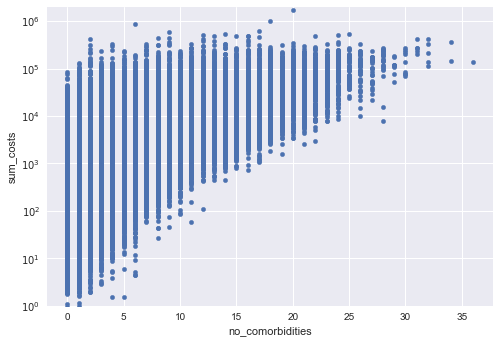

In [18]:
df_merged[['sum_costs','no_comorbidities']].plot.scatter(x='no_comorbidities',y='sum_costs', logy=True, ylim=(1,2000000))

In [21]:
pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

,A,B,C,D,E
0,0.585298,0.740388,0.716054,0.558685,0.220038
1,0.694394,0.580927,0.379979,0.898009,0.674123
2,0.465422,0.178357,0.767247,0.035562,0.330791
3,0.077354,0.820422,0.656716,0.916267,0.514164
4,0.910063,0.616616,0.519344,0.810962,0.913841
5,0.070257,0.292151,0.580146,0.558998,0.838043
6,0.644273,0.596751,0.165896,0.638991,0.752561
7,0.285805,0.812158,0.029783,0.360811,0.044787
8,0.160549,0.533999,0.987570,0.969483,0.569364
9,0.161282,0.445961,0.431110,0.793513,0.477703


In [172]:
df_merged['log_costs'] = df_merged.sum_costs.apply(lambda x: np.log(1 + x))

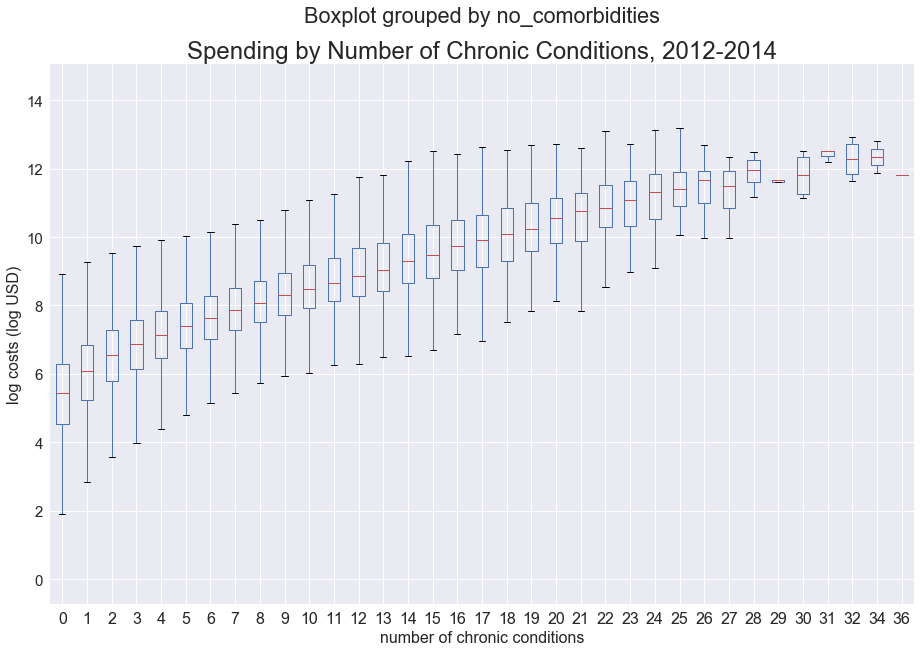

In [173]:
ax = df_merged[['log_costs','no_comorbidities']].boxplot(by='no_comorbidities', figsize=(15,10), fontsize=16)
ax.set_xlabel('number of chronic conditions', fontsize=16)
ax.set_ylabel('log costs (log USD)', fontsize=16)
ax.set_title('Spending by Number of Chronic Conditions, 2012-2014', fontsize=24)

(0, 500000)

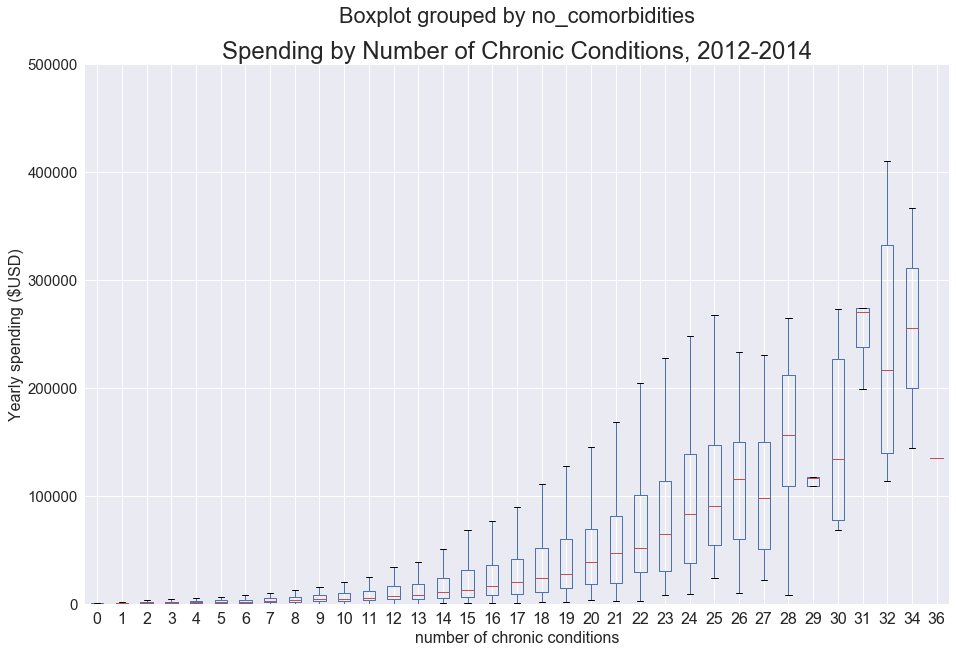

In [176]:
ax = df_merged[['sum_costs','no_comorbidities']].boxplot(by='no_comorbidities', figsize=(15,10), fontsize=16)
ax.set_xlabel('number of chronic conditions', fontsize=16)
ax.set_ylabel('Yearly spending ($USD)', fontsize=16)
ax.set_title('Spending by Number of Chronic Conditions, 2012-2014', fontsize=24)
ax.set_ylim(0,500000)

In [8]:
df_merged[df_merged.year ==2014].no_comorbidities.value_counts()

0     41030
1     30757
2     19173
3     12722
4      9762
5      7784
6      6230
7      5277
8      4313
9      3452
10     2855
11     2233
12     1765
13     1410
14     1162
15      798
16      639
17      487
18      371
19      266
20      165
21      157
22      100
23       77
24       50
25       33
26       22
27       14
28        9
29        6
30        5
31        4
32        3
36        1
Name: no_comorbidities, dtype: int64

In [12]:
df_merged.member_no.unique().shape[0]

213091

(0, 60000)

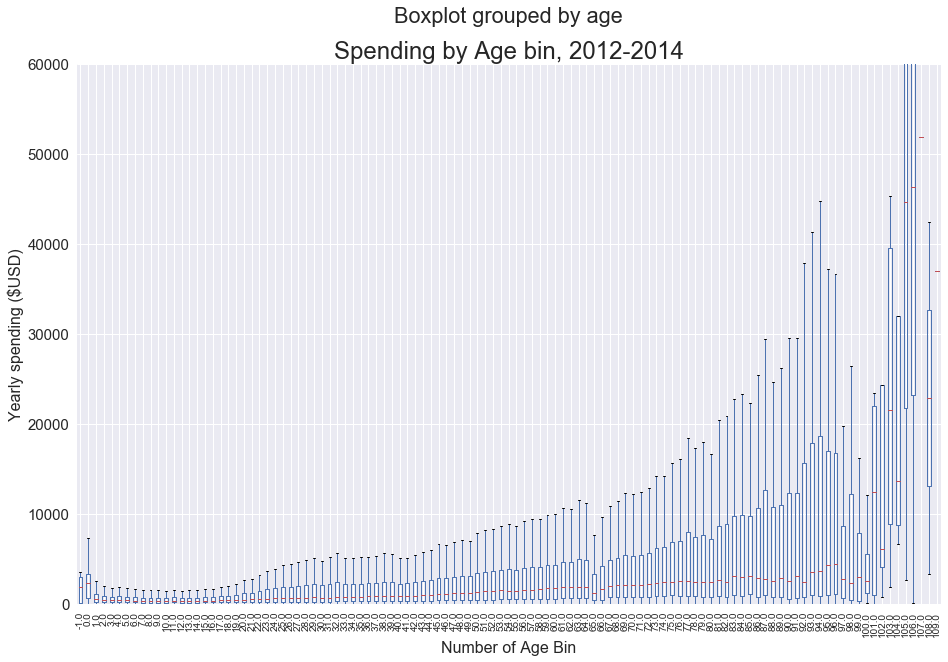

In [211]:
ax = df_merged[['sum_costs','age']].boxplot(by='age', figsize=(15,10), fontsize=10)
ax.set_xlabel('Number of Age Bin', fontsize=16)
ax.set_ylabel('Yearly spending ($USD)', fontsize=16)
ax.set_title('Spending by Age bin, 2012-2014', fontsize=24)
plt.xticks(rotation=90)
ax.set_ylim(0,60000)

(0, 20000)

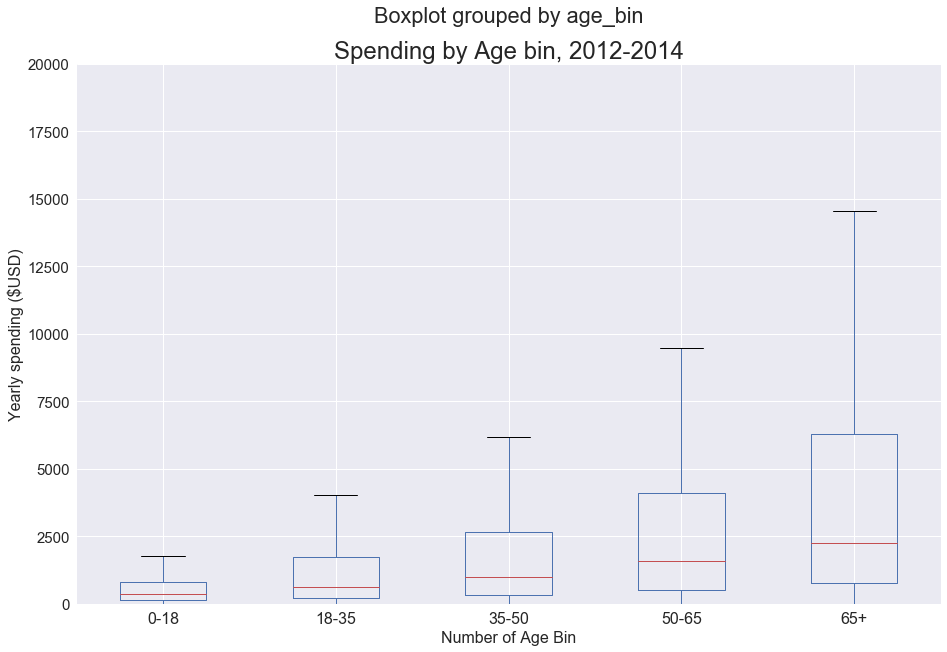

In [203]:
ax = df_merged[['sum_costs','age_bin']].boxplot(by='age_bin', figsize=(15,10), fontsize=16)
ax.set_xlabel('Number of Age Bin', fontsize=16)
ax.set_ylabel('Yearly spending ($USD)', fontsize=16)
ax.set_title('Spending by Age bin, 2012-2014', fontsize=24)
ax.set_ylim(0,20000)

(0, 280000)

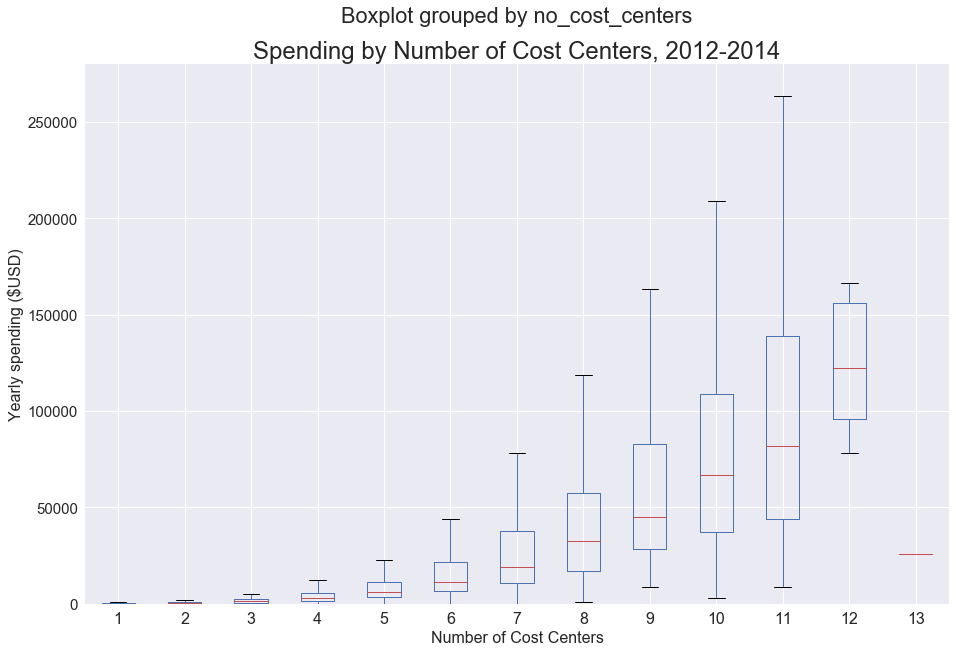

In [201]:
ax = df_merged[['sum_costs','no_cost_centers']].boxplot(by='no_cost_centers', figsize=(15,10), fontsize=16)
ax.set_xlabel('Number of Cost Centers', fontsize=16)
ax.set_ylabel('Yearly spending ($USD)', fontsize=16)
ax.set_title('Spending by Number of Cost Centers, 2012-2014', fontsize=24)
ax.set_ylim(0,280000)

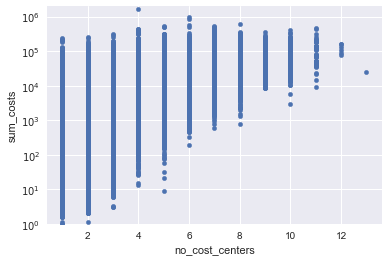

In [127]:
df_merged[['sum_costs','no_cost_centers']].plot.scatter(x='no_cost_centers',y='sum_costs', logy=True, ylim=(1,2000000))

In [ ]:
df_merged[]

# cost center clusters

In [118]:
# drop rows without proper cost center
df_merged = df_merged.dropna(subset=['agg_indices'])

In [ ]:
itertools.product#()

In [162]:
def cluster_stats(data):
    row_dict = {}
    row_dict['avg_cost'] = data.sum_costs.mean()
    row_dict['std_cost'] = data.sum_costs.std()
    row_dict['num_person_years'] = data.shape[0]
    row_dict['avg_num_com'] = data.no_comorbidities.mean()
    row_dict['std_num_com'] = data.no_comorbidities.std()
    
    return row_dict

In [163]:
cluster_stats(df_merged)

{'avg_cost': 3202.7513240321218,
 'avg_num_com': 2.948185712899003,
 'num_person_years': 381169,
 'std_cost': 11743.273389281456,
 'std_num_com': 3.6625518790900391}

In [174]:
pd.Series(cluster_stats(df_merged), name='derp')

avg_cost              3202.751324
avg_num_com              2.948186
num_person_years    381169.000000
std_cost             11743.273389
std_num_com              3.662552
Name: derp, dtype: float64

In [185]:
# cluster dyads
c_dyads = [i for i in itertools.combinations(range(0,44),2)]
c_dyad_df = pd.DataFrame()

def cluster_stats(data):
    row_dict = {}
    row_dict['avg_cost'] = data.sum_costs.mean()
    row_dict['std_cost'] = data.sum_costs.std()
    row_dict['num_person_years'] = data.shape[0]
    row_dict['avg_num_com'] = data.no_comorbidities.mean()
    row_dict['std_num_com'] = data.no_comorbidities.std()
    
    return row_dict

for i in c_dyads:
    temp = df_merged[(df_merged[i[0]]) & (df_merged[i[1]])]
    c_dyad_df = c_dyad_df.append(pd.Series(cluster_stats(temp), name=i))

In [ ]:
pd.

In [157]:
c_dyad_df = c_dyad_df.sort_values(by='avg_cost', ascending=False)
c_dyad_df['i'] = c_dyad_df.index
c_dyad_df['names'] = c_dyad_df.i.apply(lambda x: [cost_center_dict[j] for j in x])

In [160]:
c_dyad_df[c_dyad_df.num_people > 10].head()

,avg_cost,std_cost,num_people,avg_num_com,std_num_com,i,names
"(2, 28)",128296.075972,88049.471007,72,19.916667,5.223862,"(2, 28)","[NURSING FACILITY, ENDSTAGE RENAL DISEASE TRTM..."
"(14, 28)",126155.214725,82865.295159,91,19.857143,5.156595,"(14, 28)","[SKILLED NURSING FACILITY, ENDSTAGE RENAL DISE..."
"(28, 37)",95384.745760,72991.663058,250,16.960000,5.689277,"(28, 37)","[ENDSTAGE RENAL DISEASE TRTMNT FACIL, AMBULANC..."
"(0, 28)",89470.241934,67051.742287,393,16.661578,5.320347,"(0, 28)","[HOME, ENDSTAGE RENAL DISEASE TRTMNT FACIL]"
"(19, 28)",87146.973687,66358.978858,453,16.401766,5.303797,"(19, 28)","[INPATIENT HOSPITAL, ENDSTAGE RENAL DISEASE TR..."


# Clusters (just diseases)

In [39]:
for i in range(0,69):
    df_py[desc_dict[i]] = comorbidity_indicator(df_py,[str(i)])

In [198]:
# cluster dyads
d_dyads = [i for i in itertools.combinations(range(0,69),2)]
d_dyad_df = pd.DataFrame()

for i in d_dyads:
    temp = df_merged[(df_merged[desc_dict[i[0]]]) & (df_merged[desc_dict[i[1]]])]
    d_dyad_df = d_dyad_df.append(pd.Series(cluster_stats(temp), name=i))


In [218]:

oe_df = pd.DataFrame()

for i in d_dyad_df.index.tolist():
    oe_df = oe_df.append(pd.Series(oe(df_merged, i[0], i[1]), name = i))
    
d_dyad_df = pd.concat([d_dyad_df, oe_df], axis = 1)

In [221]:
d_dyad_df.columns

Index(['avg_cost', 'avg_num_com', 'num_person_years', 'std_cost',
       'std_num_com', 'names', 'expected', 'observed'],
      dtype='object')

In [222]:
d_dyad_df['O/E'] = d_dyad_df.observed / d_dyad_df.expected
d_dyad_df['frequency'] = d_dyad_df.num_person_years / df_merged.shape[0]

In [224]:
d_dyad_df.to_csv('disease_dyads_df.csv')

In [203]:
d_dyad_df['names'] = d_dyad_df.index.map(lambda x: [desc_dict[i] for i in x])

# Clusters (diseases + demographics)

In [240]:
# diseases + male or female
sexes = ['F','M']
disease_dyads = [i for i in itertools.combinations(range(0,69),2)]

b = [sexes, disease_dyads]

combos = list(itertools.product(*b))


ds_dyad_df = pd.DataFrame()

for i in combos:
    temp = df_merged[(df_merged.sex == i[0]) & (df_merged[desc_dict[i[1][0]]]) & (df_merged[desc_dict[i[1][1]]])]
    ds_dyad_df = ds_dyad_df.append(pd.Series(cluster_stats(temp), name=i))

# [over_65,sexes,diseases,cost_centers]

ds_dyad_df.to_csv('ds_dyad_df.csv')

In [242]:
# diseases + male or female + age_bin
sexes = ['F','M']
age_bins = ['0-18','18-35','35-50','50-65','65+']
disease_dyads = [i for i in itertools.combinations(range(0,69),2)]

b = [sexes, age_bins, disease_dyads]

combos = list(itertools.product(*b))

das_dyad_df = pd.DataFrame()

for i in combos:
    temp = df_merged[(df_merged.sex == i[0]) & \
                     (df_merged.age_bin == i[1]) & \
                     (df_merged[desc_dict[i[2][0]]]) & \
                     (df_merged[desc_dict[i[2][1]]])]
    das_dyad_df = das_dyad_df.append(pd.Series(cluster_stats(temp), name=i))

# [over_65,sexes,diseases,cost_centers]

das_dyad_df.to_csv('das_dyad_df.csv')

In [8]:
das_dyad_df = pd.read_csv('das_dyad_df.csv')

In [9]:
das_dyad_df['Unnamed: 0'] = das_dyad_df['Unnamed: 0'].apply(lambda x: ast.literal_eval(x))

In [10]:
das_dyad_df['Unnamed: 0'][0]

('F', '0-18', (0, 1))

In [11]:
das_dyad_df['cluster_name_long'] = das_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], x[1], [desc_dict[i] for i in x[2]]])
das_dyad_df['cluster_name_short'] = das_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], x[1], [cond_dict[i] for i in x[2]]])
das_dyad_df['total_cost'] = das_dyad_df.avg_cost * das_dyad_df.num_person_years
das_dyad_df['age_group'] = das_dyad_df['Unnamed: 0'].apply(lambda x: x[1])
das_dyad_df['sex'] = das_dyad_df['Unnamed: 0'].apply(lambda x: x[0])


In [26]:
das_dyad_df[das_dyad_df.num_person_years > 10].sort_values(by='avg_cost', ascending=False).to_csv('das_dyads_cost_gt10.csv')

In [27]:
das_dyad_df[das_dyad_df.num_person_years > 100].sort_values(by='avg_cost', ascending=False).to_csv('das_dyads_cost_gt100.csv')

In [28]:
das_dyad_df[das_dyad_df.num_person_years > 1000].sort_values(by='avg_cost', ascending=False).to_csv('das_dyads_cost_gt1000.csv')

In [16]:
das_dyad_df.sort_values(by='num_person_years', ascending=False).to_csv('das_dyads_freq_all.csv')

In [99]:
das_dyad_df.sort_values(by='total_cost', ascending=False).to_csv('das_dyads_totalcost_all.csv')

In [33]:
das_dyad_df[(das_dyad_df.sex == 'M') & (das_dyad_df.age_group == '35-50')].sort_values(by='total_cost', ascending=False).to_csv('das_dyads_totalcost_all_M_35-50.csv')

In [34]:
das_dyad_df[(das_dyad_df.sex == 'F') & (das_dyad_df.age_group == '35-50')].sort_values(by='total_cost', ascending=False).to_csv('das_dyads_totalcost_all_F_35-50.csv')

In [35]:
das_dyad_df[(das_dyad_df.sex == 'M') & (das_dyad_df.age_group == '35-50')].sort_values(by='avg_cost', ascending=False).to_csv('das_dyads_avgcost_all_F_35-50.csv')

In [36]:
das_dyad_df[(das_dyad_df.sex == 'F') & (das_dyad_df.age_group == '35-50')].sort_values(by='avg_cost', ascending=False).to_csv('das_dyads_avgcost_all_F_35-50.csv')

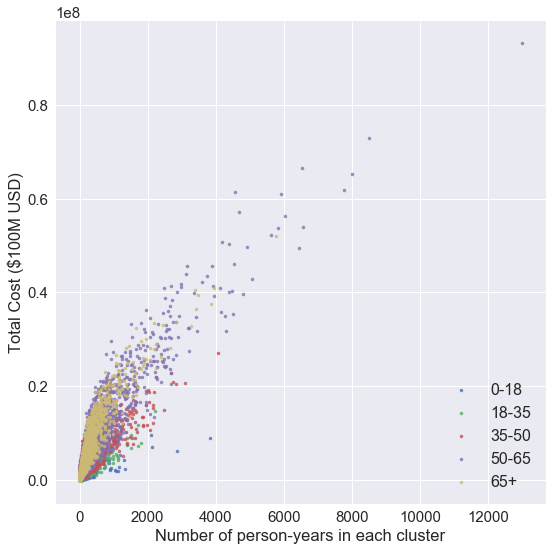

In [159]:
sns.set(font_scale=1.5)
g = sns.lmplot( x="num_person_years", y="total_cost", data=das_dyad_df, fit_reg=False, hue='age_group', markers='.', legend=False, size=8)
plt.legend(loc='lower right', fontsize=16)
plt.ylabel("Total Cost ($100M USD)")
plt.xlabel("Number of person-years in each cluster")
plt.savefig('num_prs_total_cost.png', bbox_inches = 'tight', dpi=200)

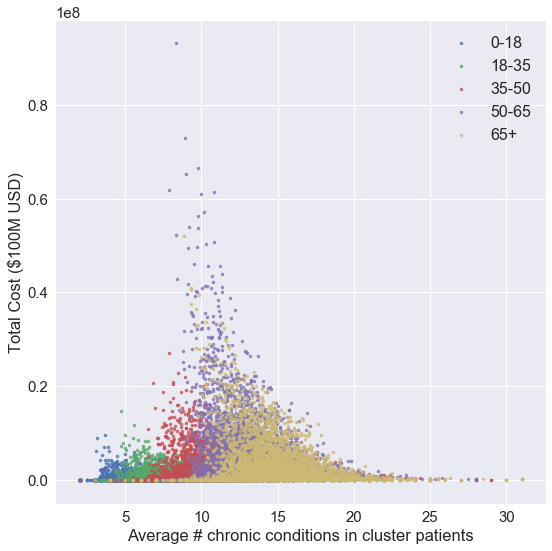

In [160]:
sns.set(font_scale=1.5)
g = sns.lmplot( x="avg_num_com", y="total_cost", data=das_dyad_df, fit_reg=False, hue='age_group', markers='.', legend=False, size=8)
plt.legend(loc='upper right', fontsize=16)
plt.ylabel("Total Cost ($100M USD)")
plt.xlabel("Average # chronic conditions in cluster patients")

plt.savefig('num_com_total_cost.png', bbox_inches = 'tight', dpi=200)


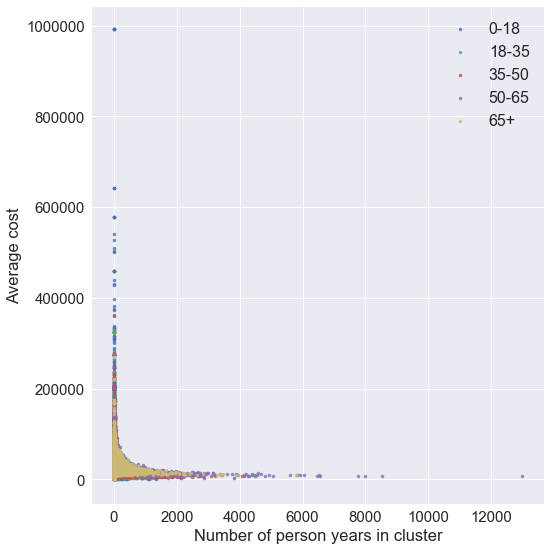

In [186]:
sns.set(font_scale=1.5)
g = sns.lmplot( x="num_person_years", y="avg_cost", data=das_dyad_df, fit_reg=False, hue='age_group', markers='.', legend=False, size=8)
plt.legend(loc='upper right', fontsize=16)
plt.ylabel("Average cost")
plt.xlabel("Number of person years in cluster")

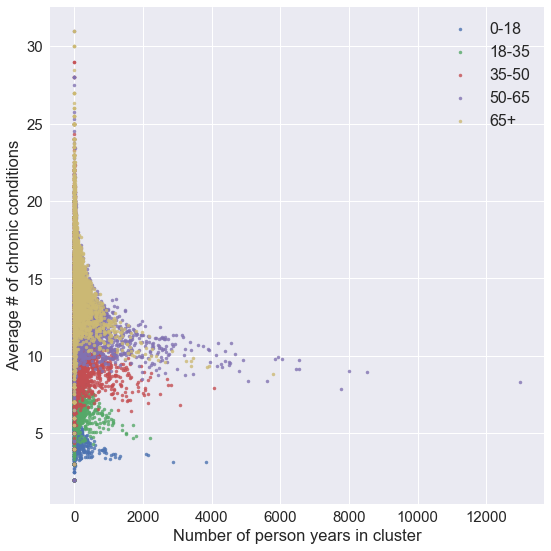

In [188]:
sns.set(font_scale=1.5)
g = sns.lmplot( x="num_person_years", y="avg_num_com", data=das_dyad_df, fit_reg=False, hue='age_group', markers='.', legend=False, size=8)
plt.legend(loc='upper right', fontsize=16)
plt.ylabel("Average # of chronic conditions")
plt.xlabel("Number of person years in cluster")

AttributeError: Unknown property hue

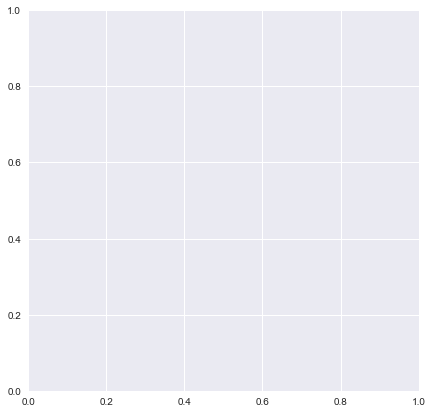

In [112]:
ax = das_dyad_df.plot.scatter(x = 'num_person_years', y = 'total_cost', fontsize = 14, figsize = (7,7))

# Clusters (diseases + demographics + cost centers)

In [ ]:
sexes = ['F','M']
age_bins = ['0-18','18-35','35-50','50-65','65+']
disease_dyads = [i for i in itertools.combinations(range(0,69),2)]
cost_dyads = [i for i in itertools.combinations(range(0,44),2)]

b = [sexes, age_bins, disease_dyads, cost_dyads]

combos = list(itertools.product(*b))

dasc_dyad_df = pd.DataFrame()


for i in combos:
    temp = df_merged[(df_merged.sex == i[0]) & \
                     (df_merged.age_bin == i[1]) & \
                     (df_merged[desc_dict[i[2][0]]]) & \
                     (df_merged[desc_dict[i[2][1]]]) & \
                     (df_merged[df_merged[i[3][0]]]) & \
                     (df_merged[df_merged[i[3][1]]])]
    dasc_dyad_df = dasc_dyad_df.append(pd.Series(cluster_stats(temp), name=i))

# [over_65,sexes,diseases,cost_centers]

dasc_dyad_df.to_csv('dasc_dyad_df.csv')

/usr/local/lib/python3.6/site-packages/pandas/indexes/base.py:2683: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [49]:
import itertools
sexes = ['F','M']
age_bins = ['0-18','18-35','35-50','50-65','65+']
disease_dyads = [i for i in itertools.combinations(range(0,69),2)]
cost_c = [i for i in itertools.combinations(range(0,44),2)]

b = [sexes, age_bins, disease_dyads, cost_c]

combos = list(itertools.product(*b))

In [50]:
len(combos

22193160

In [54]:
ds_dyad_df = pd.read_csv('ds_dyad_df.csv')

In [60]:
ds_dyad_df['Unnamed: 0'] = ds_dyad_df['Unnamed: 0'].apply(lambda x: ast.literal_eval(x))

In [65]:
ds_dyad_df['Unnamed: 0'][0][0]

'F'

In [69]:
ds_dyad_df['cluster_name'] = ds_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], [desc_dict[i] for i in x[1]]])

In [71]:
ds_dyad_df['cluster_name_short'] = ds_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], [cond_dict[i] for i in x[1]]])

# Stuff for IHME

In [7]:
df_merged.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'year', 'sum_costs',
       'no_claims', 'no_comorbidities', 'member_no', 'log_costs', 'log_claims',
       'log_no_comorbidities', 'zipcode', 'birthyear', 'age', 'sex', 'count',
       'classes', 'agg_indices', 'age_gt_65', 'age_bin'],
      dtype='object')

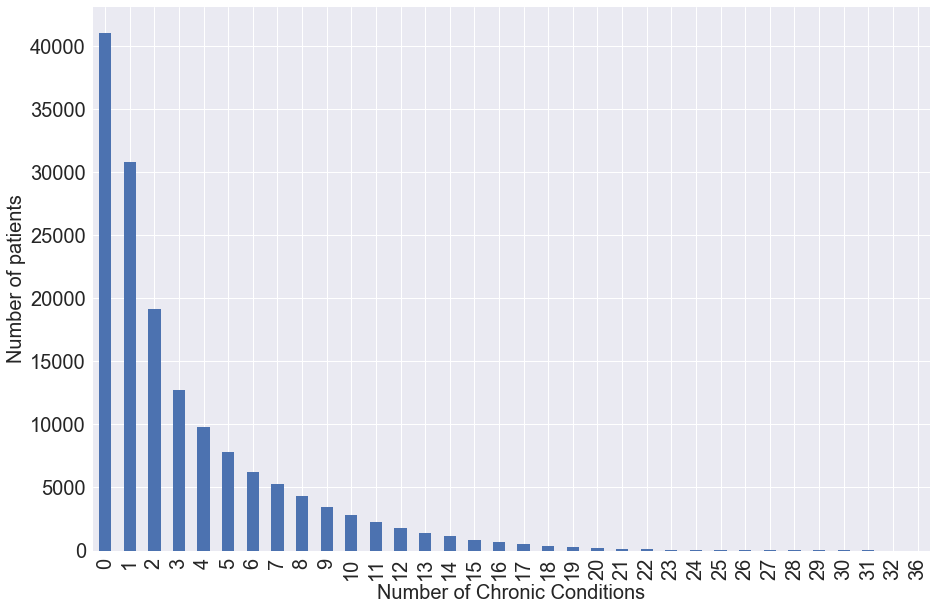

In [28]:
ax = df_merged[df_merged.year == 2014].groupby('no_comorbidities').size().plot(kind='bar', figsize=(15,10), fontsize=20)
ax.set_xlabel('Number of Chronic Conditions', size=20)
ax.set_ylabel('Number of patients', size=20)

plt.savefig('IHME_pt_count.png', bbox_inches='tight', dpi=300)

In [30]:
df_merged[df_merged.year == 2014].groupby('no_comorbidities').size().to_csv('IHME_counts.csv')

In [57]:
df_merged[(df_merged.year == 2014)].sex.value_counts()

F               81177
M               55953
Not provided    16002
Name: sex, dtype: int64

In [82]:
scipy.stats.normaltest(df_merged[(df_merged.no_comorbidities <= 2) & (df_merged.year == 2014)].age.dropna())

NormaltestResult(statistic=9645.0287592701461, pvalue=0.0)

In [83]:
import scipy
scipy.stats.mannwhitneyu(df_merged[(df_merged.no_comorbidities <= 2) & (df_merged.year == 2014)].age.dropna(), 
                         df_merged[(df_merged.no_comorbidities > 2) & (df_merged.year == 2014)].age.dropna())

MannwhitneyuResult(statistic=841602580.0, pvalue=0.0)

In [86]:
scipy.stats.chisquare(df_merged[(df_merged.no_comorbidities <= 2) & (df_merged.year == 2014)].sex.value_counts(), 
                         df_merged[(df_merged.no_comorbidities > 2) & (df_merged.year == 2014)].sex.value_counts())

Power_divergenceResult(statistic=48714.264677446263, pvalue=0.0)

In [85]:
scipy.stats.mannwhitneyu(df_merged[(df_merged.no_comorbidities <= 2) & (df_merged.year == 2014)].sum_costs.dropna(), 
                         df_merged[(df_merged.no_comorbidities > 2) & (df_merged.year == 2014)].sum_costs.dropna())

MannwhitneyuResult(statistic=970027299.0, pvalue=0.0)

In [7]:
das_dyad_df = pd.read_csv('das_dyad_df.csv')
das_dyad_df['Unnamed: 0'] = das_dyad_df['Unnamed: 0'].apply(lambda x: ast.literal_eval(x))

das_dyad_df['cluster_name_long'] = das_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], x[1], [desc_dict[i] for i in x[2]]])
das_dyad_df['cluster_name_short'] = das_dyad_df['Unnamed: 0'].apply(lambda x: [x[0], x[1], [cond_dict[i] for i in x[2]]])
das_dyad_df['total_cost'] = das_dyad_df.avg_cost * das_dyad_df.num_person_years
das_dyad_df['age_group'] = das_dyad_df['Unnamed: 0'].apply(lambda x: x[1])
das_dyad_df['sex'] = das_dyad_df['Unnamed: 0'].apply(lambda x: x[0])

das_dyad_df['cluster_name_long'] = das_dyad_df['cluster_name_long'].apply(lambda x: str(x).replace('[','').replace(']','').replace('\'','').replace(',',' +'))

In [5]:
das_dyad_df.columns

Index(['Unnamed: 0', 'avg_cost', 'avg_num_com', 'num_person_years', 'std_cost',
       'std_num_com', 'cluster_name_long', 'cluster_name_short', 'total_cost',
       'age_group', 'sex'],
      dtype='object')

In [10]:
(das_dyad_df.num_person_years > 0).sum()

18793

In [13]:
das_dyad_df.sort_values(by='num_person_years', ascending=False).head(10)[['num_person_years','cluster_name_long', 'avg_cost']]

,num_person_years,cluster_name_long,avg_cost
8267,12985.0,F + 50-65 + Hypertension + Hyperlipidemia,7171.526514
7851,8517.0,F + 50-65 + Diabetes mellitus + Hypertension,8556.807597
7863,8003.0,F + 50-65 + Diabetes mellitus + Hyperlipidemia,8142.607811
19997,7765.0,M + 50-65 + Hypertension + Hyperlipidemia,7948.440202
8261,6555.0,F + 50-65 + Hypertension + Degenerative eye problem (glauc/eye),8239.864185
7905,6536.0,F + 50-65 + Osteoarthritis + Hypertension,10166.401533
8528,6455.0,F + 50-65 + Degenerative eye problem (glauc/eye) + Hyperlipidemia,7673.643675
7917,6043.0,F + 50-65 + Osteoarthritis + Hyperlipidemia,9295.258550
7058,5921.0,F + 50-65 + Esophageal disorder and GI ulcers + Hypertension,10296.532113
7070,5832.0,F + 50-65 + Esophageal disorder and GI ulcers + Hyperlipidemia,9193.931922


In [18]:
das_dyad_df[das_dyad_df.num_person_years > 1000].sort_values(by='avg_cost', ascending=False).head(10)[['num_person_years', 'avg_cost', 'cluster_name_long']]

,num_person_years,avg_cost,cluster_name_long
22361,1082.0,24673.236599,M + 65+ + Hypertension + Conduction disorder or cardiac dysrhythmia
22362,1080.0,23039.292231,M + 65+ + Hypertension + Other central and peripheral nervous system disorders
19890,1070.0,22807.753579,M + 50-65 + Cardiomyopathy and Structual Heart Disease + Hypertension
22373,1003.0,22378.747079,M + 65+ + Hypertension + Malnutrition and F/E cond (not obesity/overweight)-includes disorders of metabolism
9255,1210.0,21897.791306,F + 50-65 + Other central and peripheral nervous system disorders + Coronary atherosclerosis
20015,1526.0,21792.670125,M + 50-65 + Hypertension + Conduction disorder or cardiac dysrhythmia
21966,1033.0,21487.228722,M + 65+ + Diabetes mellitus + Coronary atherosclerosis
22357,1163.0,21222.336956,M + 65+ + Hypertension + Chronic renal failure
8910,1244.0,21214.661969,F + 50-65 + Asthma + COPD + other chronic lung disease + Coronary atherosclerosis
20501,1183.0,20825.102544,M + 50-65 + Hyperlipidemia + Conduction disorder or cardiac dysrhythmia


In [15]:
das_dyad_df[das_dyad_df.num_person_years > 1].sort_values(by='total_cost', ascending=False).head(10)[['num_person_years','avg_cost','cluster_name_long']]

,num_person_years,avg_cost,cluster_name_long
8267,12985.0,7171.526514,F + 50-65 + Hypertension + Hyperlipidemia
7851,8517.0,8556.807597,F + 50-65 + Diabetes mellitus + Hypertension
7905,6536.0,10166.401533,F + 50-65 + Osteoarthritis + Hypertension
7863,8003.0,8142.607811,F + 50-65 + Diabetes mellitus + Hyperlipidemia
19997,7765.0,7948.440202,M + 50-65 + Hypertension + Hyperlipidemia
8286,4574.0,13432.717335,F + 50-65 + Hypertension + Other central and peripheral nervous system disorders
7058,5921.0,10296.532113,F + 50-65 + Esophageal disorder and GI ulcers + Hypertension
8271,4677.0,12193.287746,F + 50-65 + Hypertension + Asthma + COPD + other chronic lung disease
7917,6043.0,9295.258550,F + 50-65 + Osteoarthritis + Hyperlipidemia
8261,6555.0,8239.864185,F + 50-65 + Hypertension + Degenerative eye problem (glauc/eye)


In [55]:
df_merged[(df_merged.classes.apply(lambda x: set(x).issuperset(set(['49'])))) & (df_merged.sex == 'M')].sum_costs.mean()

18409.925163580247